In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Načítavanie dát

In [4]:
connections = pd.read_csv('data/081/connections.csv', on_bad_lines='warn', delimiter='\t')
devices = pd.read_csv('data/081/devices.csv', on_bad_lines='warn', delimiter='\t')
processes = pd.read_csv('data/081/processes.csv', on_bad_lines='warn', delimiter='\t')
profiles = pd.read_csv('data/081/profiles.csv', on_bad_lines='warn', delimiter='\t')

# 1.1 A

## Opis dát

In [3]:
connections.head()

,ts,imei,mwra,c.android.youtube,c.android.chrome,c.android.gm,c.dogalize,c.katana,c.UCMobile.x86,c.updateassist,c.android.vending,c.UCMobile.intl,c.raider
0,2018-05-05 10:00:00,8630330696303482162,0.0,13.42668,15.66393,11.65566,10.64494,10.08955,70.03983,48.23639,64.64275,81.97591,7.36220
1,2018-05-05 10:01:00,8630330696303481370,0.0,11.45362,10.75380,9.79337,17.14804,15.31063,55.17141,48.61060,49.60841,38.25160,56.58256
2,2018-05-05 10:02:00,3590433799317661941,1.0,16.33410,7.54294,7.33426,12.91862,17.03970,44.36041,57.53637,17.15762,93.66474,47.72499
3,2018-05-05 10:03:00,3590433799317661370,1.0,12.27418,12.72129,11.98519,8.49009,12.40497,49.59519,50.91479,86.52847,3.66828,15.77725
4,2018-05-05 10:04:00,3590433799317661628,0.0,10.96774,11.00387,12.92665,15.85612,10.30359,20.78323,44.93539,41.46109,45.39833,11.02030


In [4]:
connections.info()
connections.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15162 entries, 0 to 15161
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15162 non-null  object 
 1   imei               15162 non-null  int64  
 2   mwra               15162 non-null  float64
 3   c.android.youtube  15162 non-null  float64
 4   c.android.chrome   15162 non-null  float64
 5   c.android.gm       15162 non-null  float64
 6   c.dogalize         15162 non-null  float64
 7   c.katana           15162 non-null  float64
 8   c.UCMobile.x86     15162 non-null  float64
 9   c.updateassist     15162 non-null  float64
 10  c.android.vending  15162 non-null  float64
 11  c.UCMobile.intl    15162 non-null  float64
 12  c.raider           15162 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


,imei,mwra,c.android.youtube,c.android.chrome,c.android.gm,c.dogalize,c.katana,c.UCMobile.x86,c.updateassist,c.android.vending,c.UCMobile.intl,c.raider
count,1.516200e+04,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000
mean,3.923871e+18,0.626698,13.119660,11.947438,11.949905,12.500060,12.484151,50.323781,52.536704,49.469003,50.004304,49.727124
std,3.321549e+18,0.483697,2.605412,2.652434,2.614210,2.637516,2.565811,13.268816,13.034044,28.937254,28.838077,28.698003
min,3.590434e+17,0.000000,4.135800,2.456990,2.399800,2.748560,4.419040,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,11.383815,10.032775,10.093725,10.633720,10.548925,41.401637,43.777812,24.488428,24.978685,25.345785
50%,3.590434e+18,1.000000,13.321610,11.889335,11.886435,12.647560,12.318145,50.090725,52.525540,49.248720,50.390130,49.815600
75%,8.630331e+18,1.000000,14.969463,13.854020,13.824647,14.435635,14.352718,59.297940,61.456370,74.709677,74.982998,74.046170
max,8.630331e+18,1.000000,22.880240,21.208900,22.046630,21.451520,21.651550,100.000000,100.000000,100.000000,100.000000,100.000000


Môžeme pozorovať, že v tabuľke connections sa nenachádzajú žiadne nedefinované hodnoty. Tabuľka má 15162 riadkov. Celkovo je tabuľka zložená z 1 stĺpca objekov, ktoré reprezentujú timestamp, 10 spojitých atribútov s dátovým typom float64 a 1 kategorický atribút int64, ktorý reprezentuje identifikátor a 1 kategorický atribút float64, ktorý reprezentuje infikovanosť. Taktiež vidíme, že 63% záznamov bolo napadnutých malware-om.

In [5]:
devices.head()

,latitude,longitude,store_name,code,location,imei
0,50.75767,-1.54430,Lymington,GB,Europe/London,3590433799317661636
1,53.95278,32.86389,Roslavl‚Äô,RU,Europe/Moscow,359043379931766130
2,20.74122,-100.44843,Santa Rosa Jauregui,MX,America/Mexico_City,8630330696303482261
3,54.58048,16.86194,Ustka,PL,Europe/Warsaw,8630330696303481164
4,14.37395,100.48528,Bang Ban,TH,Asia/Bangkok,359043379931766262


In [6]:
devices.info()
devices.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2982 non-null   float64
 1   longitude   2982 non-null   float64
 2   store_name  2982 non-null   object 
 3   code        2980 non-null   object 
 4   location    2982 non-null   object 
 5   imei        2982 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 139.9+ KB


,latitude,longitude,imei
count,2982.000000,2982.000000,2.982000e+03
mean,28.858931,13.226179,3.821491e+18
std,23.364133,72.452759,3.275767e+18
min,-44.396720,-156.474320,3.590434e+17
25%,14.505377,-50.006390,8.630331e+17
50%,36.533330,10.580820,3.590434e+18
75%,45.790505,73.079458,8.630331e+18
max,68.798330,178.004170,8.630331e+18


Tabuľka devices obsahuje 2 záznamy s nedefinovanou hodnotou v stĺpci code. Ďalej pozorujeme, že tabuľka obsahuje len 2 spojité atribúty a 2 kategorické, keď nerátame s identifikátorom. Vidíme, že dáta su zozbierané roztrúsené z viaceych častí sveta, čo nám dokazuje priemer atribútov [lattitude, longitude], ktorý sa blíži k hodnote [0, 0]

In [7]:
processes.head()

,ts,imei,mwra,p.android.packageinstaller,p.android.documentsui,p.system,p.android.externalstorage,p.android.chrome,p.android.settings,p.android.gm,...,p.notifier,p.katana,p.google,p.android.defcontainer,p.simulator,p.android.gms,p.dogalize,p.gms.persistent,p.browser.provider,p.olauncher
0,2018-05-05 10:00:00,8630330696303482162,0.0,15.88869,10.05795,13.35182,11.49810,11.32636,15.26689,13.90930,...,13.08851,20.09143,82.79608,66.64918,34.95928,83.11314,80.79682,21.05406,57.70783,62.72112
1,2018-05-05 10:01:00,8630330696303481370,0.0,8.59717,10.84683,11.02006,10.21514,10.77112,17.05934,14.49830,...,57.82027,82.73715,2.96508,47.76478,67.03415,75.16736,76.36189,88.33102,61.47245,75.35502
2,2018-05-05 10:02:00,3590433799317661941,1.0,11.63475,13.83435,12.42586,15.64822,12.59035,15.08535,13.79256,...,49.83197,3.40068,74.76720,88.20151,27.44695,50.96700,26.92772,96.30272,50.45846,96.49968
3,2018-05-05 10:03:00,3590433799317661370,1.0,9.72483,11.01749,14.47931,16.53736,11.39341,15.09234,17.66187,...,73.80461,84.15959,11.84456,87.18456,88.42178,47.68328,2.08008,48.94879,25.98894,56.23937
4,2018-05-05 10:04:00,3590433799317661628,0.0,11.90430,10.98283,13.36029,15.41702,18.59375,13.91144,13.34290,...,39.66409,78.46198,75.06329,23.80547,19.83619,46.47065,93.48875,44.13500,60.44037,47.82343


In [8]:
processes.info()
processes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15162 entries, 0 to 15161
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ts                          15162 non-null  object 
 1   imei                        15162 non-null  int64  
 2   mwra                        15162 non-null  float64
 3   p.android.packageinstaller  15162 non-null  float64
 4   p.android.documentsui       15162 non-null  float64
 5   p.system                    15162 non-null  float64
 6   p.android.externalstorage   15162 non-null  float64
 7   p.android.chrome            15162 non-null  float64
 8   p.android.settings          15162 non-null  float64
 9   p.android.gm                15162 non-null  float64
 10  p.inputmethod.latin         15162 non-null  float64
 11  p.android.vending           15162 non-null  float64
 12  p.process.gapps             15162 non-null  float64
 13  p.notifier                  151

,imei,mwra,p.android.packageinstaller,p.android.documentsui,p.system,p.android.externalstorage,p.android.chrome,p.android.settings,p.android.gm,p.inputmethod.latin,...,p.notifier,p.katana,p.google,p.android.defcontainer,p.simulator,p.android.gms,p.dogalize,p.gms.persistent,p.browser.provider,p.olauncher
count,1.516200e+04,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,...,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000,15162.000000
mean,3.923871e+18,0.626698,11.326046,11.848870,13.670559,13.055184,11.881308,14.310053,13.132933,54.037651,...,47.207102,49.681392,49.686647,50.041205,50.289712,50.226288,49.865521,49.877674,49.605885,49.839759
std,3.321549e+18,0.483697,2.209583,2.738104,2.277519,2.675060,2.559545,1.803823,2.624266,13.564650,...,12.849429,28.975010,28.915917,28.941554,28.824253,28.779530,29.036963,28.949208,29.052083,28.868849
min,3.590434e+17,0.000000,3.110500,0.000000,4.550230,2.936650,2.360010,6.172530,3.716390,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,9.853388,9.965942,12.253902,11.168423,10.094302,13.155487,11.415978,44.749185,...,38.623005,24.690973,24.440675,24.915435,25.271123,25.606243,24.552067,24.592910,24.234525,24.769848
50%,3.590434e+18,1.000000,11.099845,11.601655,13.846610,13.135550,11.631625,14.318000,13.358530,54.129555,...,47.214555,49.279675,49.627770,50.379485,50.065190,50.386350,49.941625,49.563415,50.072235,49.543865
75%,8.630331e+18,1.000000,12.556738,13.592090,15.252290,14.970375,13.631315,15.469337,14.982325,63.305960,...,55.891710,74.871792,74.791145,74.941405,75.358277,75.183132,75.389985,75.026663,74.791150,74.949430
max,8.630331e+18,1.000000,22.084980,23.338080,22.717330,21.937050,20.892390,22.418190,22.254860,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Vidíme, že tabuľka processes neobsahuje žiadne nedefinované záznamy. Ďalej môžeme sledovať, že priemer a štandardná odchylka infikovanosti zariadení sa zhoduje s priemerom a štandardnou odchylkou v tabuľke connections. Sledujeme, že tabuľka obsahuje 2 kategorické atribúty mwra a imei a 21 spojitých atribútov. 

In [9]:
profiles.head()

,name,ssn,birthdate,company,current_location,imei,user_id,address,username,registration,mail,job
0,Adam Buckley,256-10-3282,NaN,Thompson PLC,"(Decimal('-27.796214'), Decimal('35.724897'))",8630330696303481321,261,"2356 Kelly Stravenue\nNorth Nicholechester, WV...",brandyvaughn,"11/03/2019, 00:00:00",brooksmelinda@hotmail.com,"Engineer, maintenance"
1,William Mccall,836-85-9036,NaN,"Brewer, Jones and Simpson",NaN,359043379931766197,1432,"83245 Jack Port Suite 186\nHeathermouth, MP 26449",daniel34,07 May 2023,michellehaley@gmail.com,NaN
2,Tabitha Silva,316-02-7078,2013-01-13,James Group,"(Decimal('75.6463495'), Decimal('-101.730814'))",3590433799317661321,340,"6584 Jody Flat\nMichaelport, DC 53671",ashley60,"03/16/2019, 00:00:00",xmartinez@yahoo.com,NaN
3,Diane Perez,207-68-5498,1944-07-28,"Warren, Frank and Cox","(Decimal('-78.0240235'), Decimal('-40.012949'))",8630330696303481362,447,"6554 Fox Haven\nStokesstad, IA 11756",richardhoward,"04/07/2018, 00:00:00",fischerlindsey@gmail.com,NaN
4,Mrs. Sharon Villegas,389-65-1005,NaN,Green-Richardson,"(Decimal('62.4863645'), Decimal('112.231295'))",8630330696303482287,1342,"67336 Peter Rue\nKathyland, AK 30553",mcbrideshaun,2022/05/21,gilbertwilliam@yahoo.com,NaN


In [10]:
profiles.info()
profiles.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              2518 non-null   object
 1   ssn               2518 non-null   object
 2   birthdate         1385 non-null   object
 3   company           2518 non-null   object
 4   current_location  2392 non-null   object
 5   imei              2518 non-null   int64 
 6   user_id           2518 non-null   int64 
 7   address           2140 non-null   object
 8   username          2518 non-null   object
 9   registration      2518 non-null   object
 10  mail              2518 non-null   object
 11  job               755 non-null    object
dtypes: int64(2), object(10)
memory usage: 236.2+ KB


,imei,user_id
count,2.518000e+03,2518.000000
mean,3.805736e+18,1255.986100
std,3.317665e+18,725.617082
min,3.590434e+17,0.000000
25%,8.630331e+17,629.000000
50%,3.590434e+18,1247.000000
75%,8.630331e+18,1881.500000
max,8.630331e+18,2517.000000


Sledujeme, že je v tabuľke profiles veľa hodnôt nedefinovaných. Ako príkladom môže slúžiť atribút job, ktorý má hodnotu len v 755 záznamoch z celkových 2518 záznamov. Takéto atribúty nemá cenu brať do úvahy, a preto ich neskôr odstránime. Zas atribút current location väčšinu hodnôt má, tak zvyšné si dodefinujeme. Celkovo má tabuľka 3 spojité atribúty, t.j. current_location, birthdate a registration, a 9 kategorických.

## Počet riadkov a atribútov

In [11]:
print('connections:' + str(connections.shape))
print('devices:' + str(devices.shape))
print('processes:' + str(processes.shape))
print('profiles:' + str(profiles.shape))

connections:(15162, 13)
devices:(2982, 6)
processes:(15162, 23)
profiles:(2518, 12)


## Null values

In [12]:
connections[connections.isnull().any(axis=1)]

,ts,imei,mwra,c.android.youtube,c.android.chrome,c.android.gm,c.dogalize,c.katana,c.UCMobile.x86,c.updateassist,c.android.vending,c.UCMobile.intl,c.raider


In [13]:
devices[devices.isnull().any(axis=1)]

,latitude,longitude,store_name,code,location,imei
1829,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,863033069630348545
2850,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,3590433799317661016


Vidíme, že tabuľka devices má len 2 nedefinované hodnoty, a to v atribúte code, ktorý reprezentuje kód krajiny. Ten ale vieme jednoducho doplniť vďaka informácii z atribútu location.

In [14]:
processes[processes.isnull().any(axis=1)]

,ts,imei,mwra,p.android.packageinstaller,p.android.documentsui,p.system,p.android.externalstorage,p.android.chrome,p.android.settings,p.android.gm,...,p.notifier,p.katana,p.google,p.android.defcontainer,p.simulator,p.android.gms,p.dogalize,p.gms.persistent,p.browser.provider,p.olauncher


In [15]:
profiles[profiles.isnull().any(axis=1)]

,name,ssn,birthdate,company,current_location,imei,user_id,address,username,registration,mail,job
0,Adam Buckley,256-10-3282,NaN,Thompson PLC,"(Decimal('-27.796214'), Decimal('35.724897'))",8630330696303481321,261,"2356 Kelly Stravenue\nNorth Nicholechester, WV...",brandyvaughn,"11/03/2019, 00:00:00",brooksmelinda@hotmail.com,"Engineer, maintenance"
1,William Mccall,836-85-9036,NaN,"Brewer, Jones and Simpson",NaN,359043379931766197,1432,"83245 Jack Port Suite 186\nHeathermouth, MP 26449",daniel34,07 May 2023,michellehaley@gmail.com,NaN
2,Tabitha Silva,316-02-7078,2013-01-13,James Group,"(Decimal('75.6463495'), Decimal('-101.730814'))",3590433799317661321,340,"6584 Jody Flat\nMichaelport, DC 53671",ashley60,"03/16/2019, 00:00:00",xmartinez@yahoo.com,NaN
3,Diane Perez,207-68-5498,1944-07-28,"Warren, Frank and Cox","(Decimal('-78.0240235'), Decimal('-40.012949'))",8630330696303481362,447,"6554 Fox Haven\nStokesstad, IA 11756",richardhoward,"04/07/2018, 00:00:00",fischerlindsey@gmail.com,NaN
4,Mrs. Sharon Villegas,389-65-1005,NaN,Green-Richardson,"(Decimal('62.4863645'), Decimal('112.231295'))",8630330696303482287,1342,"67336 Peter Rue\nKathyland, AK 30553",mcbrideshaun,2022/05/21,gilbertwilliam@yahoo.com,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2511,Anthony Charles,575-56-3211,1942-01-26,"Franklin, Palmer and Burns","(Decimal('-13.512617'), Decimal('112.161223'))",3590433799317662188,195,"87681 Donald Stream Apt. 859\nPort Stephen, DE...",hholland,2018/08/10,fcalderon@hotmail.com,NaN
2512,Jessica Vargas,200-19-0810,NaN,Meyer-Hines,"(Decimal('35.0437145'), Decimal('65.906809'))",3590433799317661222,2153,"2953 Paul Station\nCalhounborough, MI 41391",travis21,18 Jan 2023,kirkwilliam@hotmail.com,NaN
2513,Jennifer Walker,777-48-0523,1988-08-24,"Baldwin, Sweeney and Campbell","(Decimal('46.5649145'), Decimal('-19.471836'))",8630330696303481636,1283,"482 Ashley Heights Suite 415\nHamiltonport, OH...",randalljohn,2019/07/27,emckee@hotmail.com,NaN
2515,Antonio Wilson,471-27-0192,1911-06-13,Torres and Sons,"(Decimal('-58.5421945'), Decimal('92.471667'))",3590433799317661560,947,"3259 Shelia Locks\nRobertstad, IN 31032",hughestravis,"02/29/2020, 00:00:00",xrodriguez@gmail.com,NaN


Vidíme, že tabuľka profiles obsahuje mnoho riadkov s nedefinovanými hodnotami v rôznych atribútoch. Konkrétnemu riešeniu sa budeme venovať neskôr.

# 1.1.B

## Výber atribútov

Ďalšia časť sa týka analýzy významných atribútov. Keďže o danom datasete ešte nepoznáme veľa informácií, ktoré by sme mohli považovať ako za dôležité, tak sa budeme orientovať hlavne na základe sémantických významov daných atribútov a taktiež typu (či sú kvalitatívne alebo kvantitatívne).

## connections

Táto tabuľka obsahuje atribúty, ktoré prevažne popisujú používanie (množstvo alebo čas) aplikácií na daných zariadeniach. Niektoré atribúty sú hneď známe a padnú do oka (napr. youtube, chrome), ale niektoré vyžadovali dodatočné vyhľadávanie informácií (t. j. katana je codename pre facebook, gm znamená gmail, atď.). Vzhľadom na popularitu jednotlivých aplikácií som sa rozhodol z tejto tabuľky zobrať nasledovných 5 atribútov: c.android.youtube, c.android.chrome, c.android.gm, c.katana a c.android.vending (Google App playstore).

### c.android.youtube

#### Distribúcia

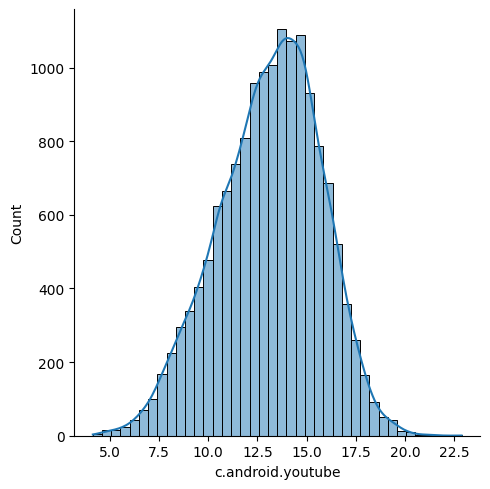

In [16]:
sns.displot(connections["c.android.youtube"], bins=40, kde=True)

Môžeme vidieť, že dané dáta inklinujú k normálnej distribúcii.

#### Priemer

In [17]:
np.mean(connections["c.android.youtube"])

np.float64(13.119659893153939)

#### Medián

In [18]:
np.median(connections["c.android.youtube"])

np.float64(13.32161)

#### Módus

In [19]:
stats.mode(connections["c.android.youtube"])

ModeResult(mode=np.float64(9.74103), count=np.int64(3))

### c.android.chrome

#### Distribúcia

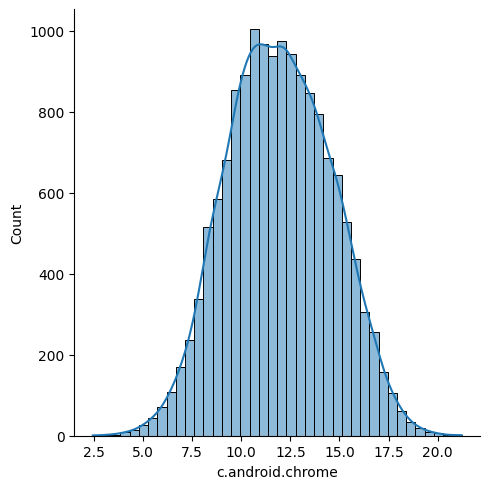

In [20]:
sns.displot(connections["c.android.chrome"], bins=40, kde=True)

Hodnoty tejto premennej tiež podliehajú normálnej distribúcii.

#### Priemer

In [21]:
np.mean(connections["c.android.chrome"])

np.float64(11.947437883524602)

#### Medián

In [22]:
np.median(connections["c.android.chrome"])

np.float64(11.889334999999999)

#### Módus

In [23]:
stats.mode(connections["c.android.chrome"])

ModeResult(mode=np.float64(12.3732), count=np.int64(3))

### c.android.gm

#### Distribúcia

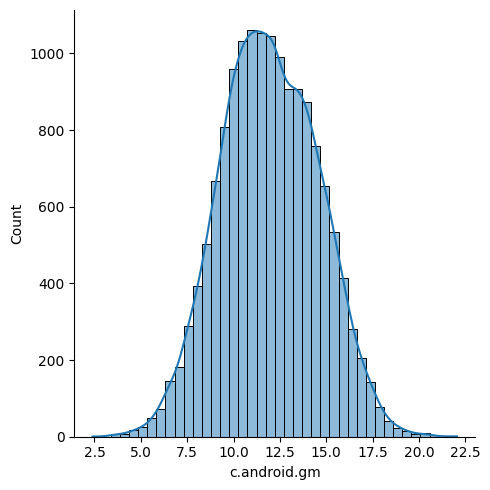

In [24]:
sns.displot(connections["c.android.gm"], bins=40, kde=True)

Hodnoty tejto premennej tiež podliehajú normálnej distribúcii, avšak s minimálnym right-skewom.

#### Priemer

In [25]:
np.mean(connections["c.android.gm"])

np.float64(11.949904859517213)

#### Medián

In [26]:
np.median(connections["c.android.gm"])

np.float64(11.886434999999999)

#### Módus

In [27]:
stats.mode(connections["c.android.gm"])

ModeResult(mode=np.float64(8.86941), count=np.int64(3))

### c.android.vending

#### Distribúcia

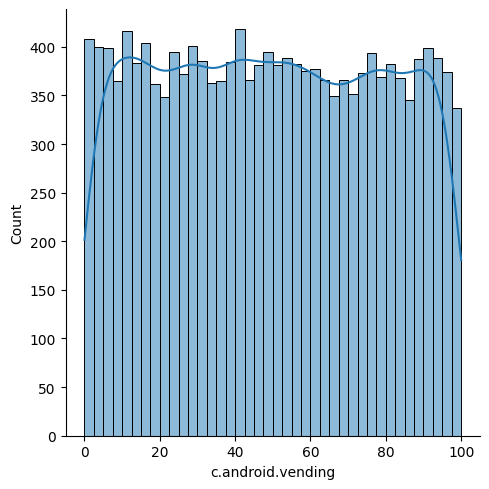

In [28]:
sns.displot(connections["c.android.vending"], bins=40, kde=True)

Tieto dáta narozdiel od predošlých podliehajú uniformnej distribúcii.

#### Priemer

In [29]:
np.mean(connections["c.android.vending"])

np.float64(49.469002548476446)

#### Medián

In [30]:
np.median(connections["c.android.vending"])

np.float64(49.24872)

#### Módus

In [31]:
stats.mode(connections["c.android.vending"])

ModeResult(mode=np.float64(49.66763), count=np.int64(3))

### c.katana

#### Distribúcia

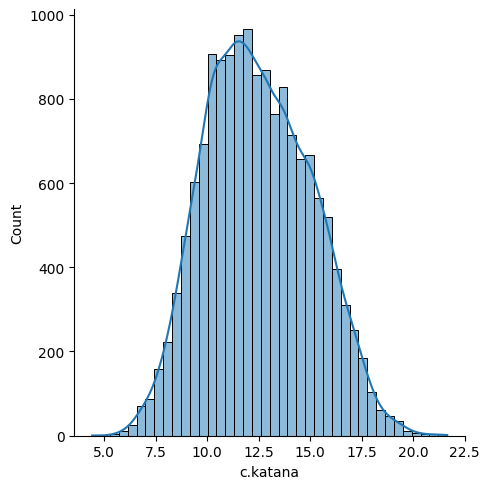

In [32]:
sns.displot(connections["c.katana"], bins=40, kde=True)

Dané hodnoty znova podliehajú normálnej distribúcii s minimálnym right-skewom.

#### Priemer

In [33]:
np.mean(connections["c.katana"])

np.float64(12.484150555335708)

#### Medián

In [34]:
np.median(connections["c.katana"])

np.float64(12.318145000000001)

#### Módus

In [35]:
stats.mode(connections["c.katana"])

ModeResult(mode=np.float64(10.62304), count=np.int64(3))

### Boxploty daných atribútov

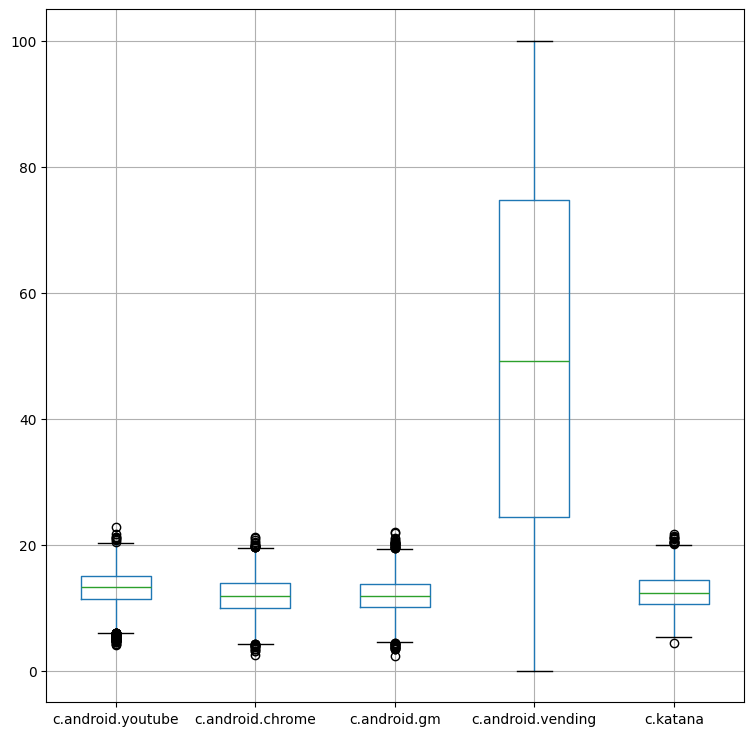

In [36]:
selected_connections_columns = ['c.android.youtube', 'c.android.chrome', 'c.android.gm', 'c.android.vending', 'c.katana']

plt.figure(figsize=(9, 9)) 
connections[selected_connections_columns].boxplot()
plt.show()

### Violin grafy daných atribútov

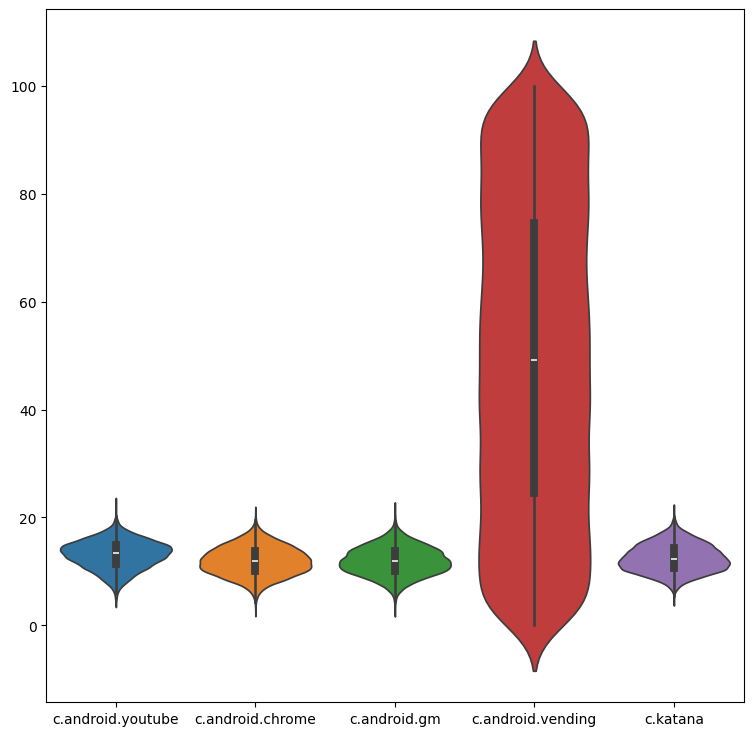

In [37]:
plt.figure(figsize=(9,9))
sns.violinplot(connections[selected_connections_columns])
plt.show()

Violin grafy taktiež naznačujú, že c.android.vending sleduje uniform distribúciu a ostatné atribúty sledujú normálnu distribúciu.

## devices

Len niektoré atribúty z tejto tabuľky sú kvantitatívne, a to konkrétne imei (International Mobile Equipment Identity, t.j. unikátny identifikátor mobilného zariadenia) a následne zemepisná dĺžka a šírka. Keďže identifikátor nie je možné zmysluplne štatisticky analyzovať a nevidím zatiaľ súvis medzi zemepisnou šírkou a dĺžkou zakúpenia zariadenia a počtu zariadení infikovaných malwarom, považujem analýzu týchto atribútov za bezvýznamnú.

## processes

Táto tabuľka obsahuje niektoré atribúty, ktoré pravdepodobne korelujú s niektorými inými zo súboru connections, no niektoré sú unikátne pre tento súbor, ako napríklad p.android.packageinstaller, p.system, p.android.settings, p.process.gapps a p.olauncher. Na základe predpokladaných významov týchto názvov som sa rozhodol analyzovať tieto atribúty.

### p.android.packageinstaller

#### Distribúcia

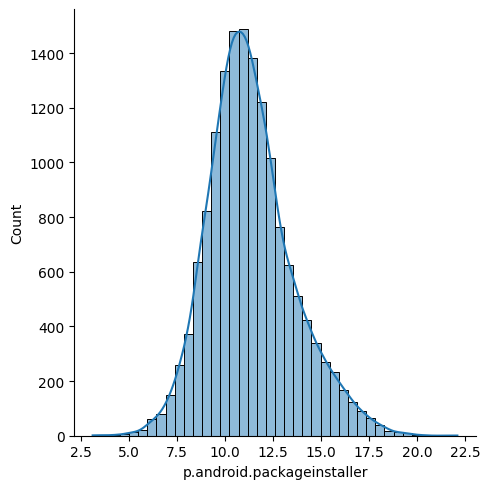

In [38]:
sns.displot(processes["p.android.packageinstaller"], bins=40, kde=True)

Môžeme vidieť, že dané dáta inklinujú k normálnej distribúcii s malým right-skewom.

#### Priemer

In [39]:
np.mean(processes["p.android.packageinstaller"])

np.float64(11.326046034164357)

#### Medián

In [40]:
np.median(processes["p.android.packageinstaller"])

np.float64(11.099845)

#### Módus

In [41]:
stats.mode(processes["p.android.packageinstaller"])

ModeResult(mode=np.float64(9.76992), count=np.int64(3))

### p.system

#### Distribúcia

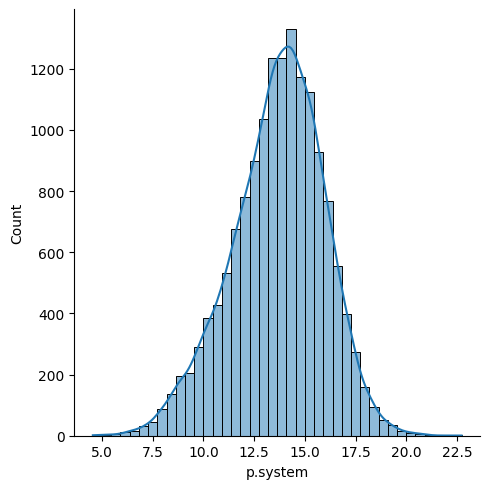

In [42]:
sns.displot(processes["p.system"], bins=40, kde=True)

Môžeme vidieť, že dané dáta inklinujú k normálnej distribúcii, no tento raz s jemným left-skewom.

#### Priemer

In [43]:
np.mean(processes["p.system"])

np.float64(13.670558597150773)

#### Medián

In [44]:
np.median(processes["p.system"])

np.float64(13.84661)

#### Módus

In [45]:
stats.mode(processes["p.system"])

ModeResult(mode=np.float64(12.98587), count=np.int64(3))

### p.android.settings

#### Distribúcia

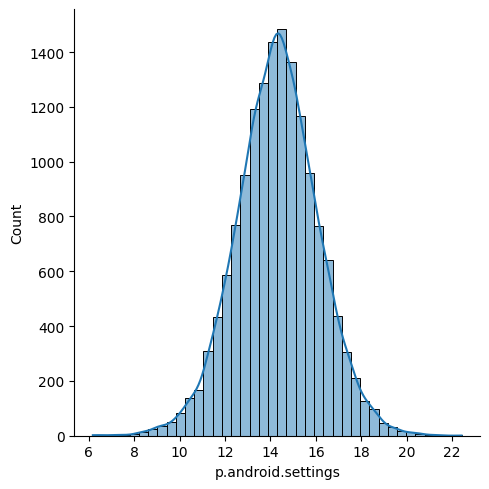

In [46]:
sns.displot(processes["p.android.settings"], bins=40, kde=True)

Tieto hodnoty tiež predstavujú normálnu distribúciu.

#### Priemer

In [47]:
np.mean(processes["p.android.settings"])

np.float64(14.310053117003035)

#### Medián

In [48]:
np.median(processes["p.android.settings"])

np.float64(14.318)

#### Módus

In [49]:
stats.mode(processes["p.android.settings"])

ModeResult(mode=np.float64(13.07896), count=np.int64(3))

### p.process.gapps

#### Distribúcia

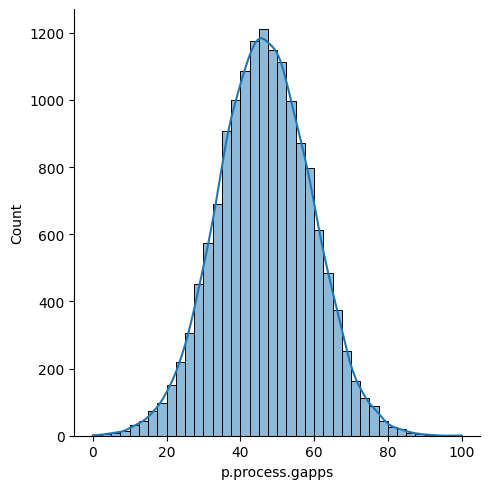

In [50]:
sns.displot(processes["p.process.gapps"], bins=40, kde=True)

Tieto hodnoty tiež predstavujú normálnu distribúciu.

#### Priemer

In [51]:
np.mean(processes["p.process.gapps"])

np.float64(46.60420038451392)

#### Medián

In [52]:
np.median(processes["p.process.gapps"])

np.float64(46.510845)

#### Módus

In [53]:
stats.mode(processes["p.process.gapps"])

ModeResult(mode=np.float64(32.27951), count=np.int64(3))

### p.olauncher

#### Distribúcia

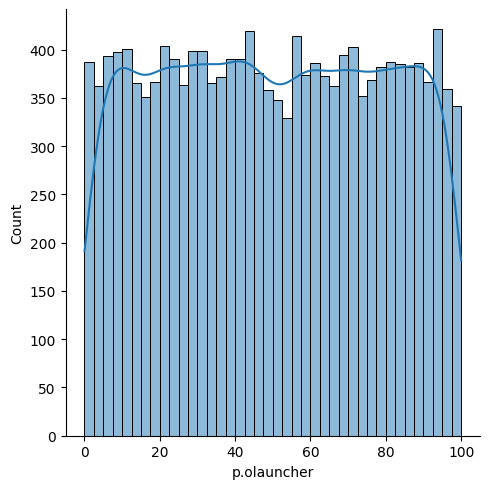

In [54]:
sns.displot(processes["p.olauncher"], bins=40, kde=True)

Tieto hodnoty sa už správajú inak, reprezentujú uniformnú distribúciu

#### Priemer

In [55]:
np.mean(processes["p.olauncher"])

np.float64(49.83975937870993)

#### Medián

In [56]:
np.median(processes["p.olauncher"])

np.float64(49.543865)

#### Módus

In [57]:
stats.mode(processes["p.olauncher"])

ModeResult(mode=np.float64(3.46608), count=np.int64(3))

### Boxploty daných atribútov

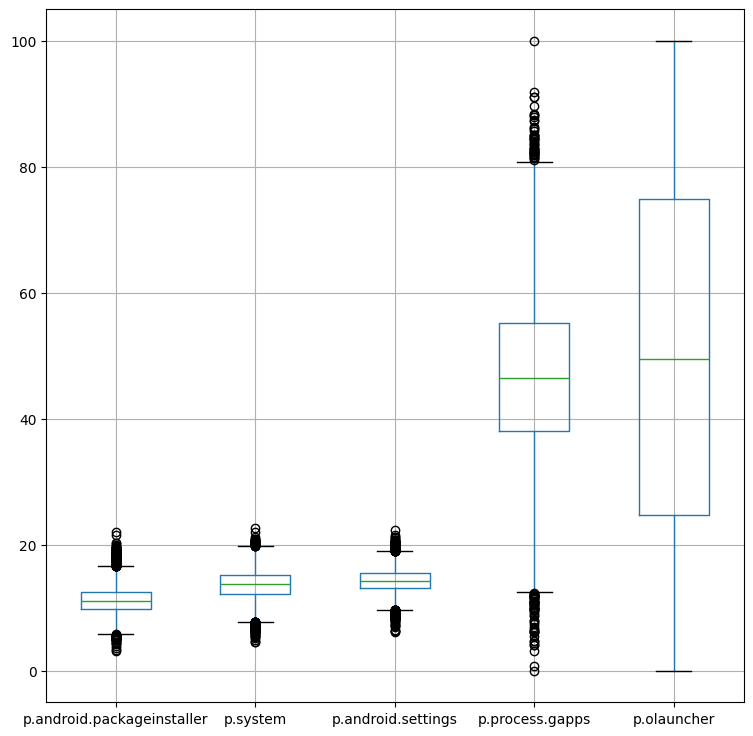

In [3]:
selected_processes_columns = ['p.android.packageinstaller', 'p.system', 'p.android.settings', 'p.process.gapps', 'p.olauncher']

plt.figure(figsize=(9, 9)) 
processes[selected_processes_columns].boxplot()
plt.show()

Môžeme vyčítať, že p.process.gapps a p.olauncher majú výrazne vyššie mediány ako ostatné atribúty, a taktiež že ich p.process.gapps obsahuje outliery vzdialené ďaleko od whiskers.

### Violin grafy daných atribútov

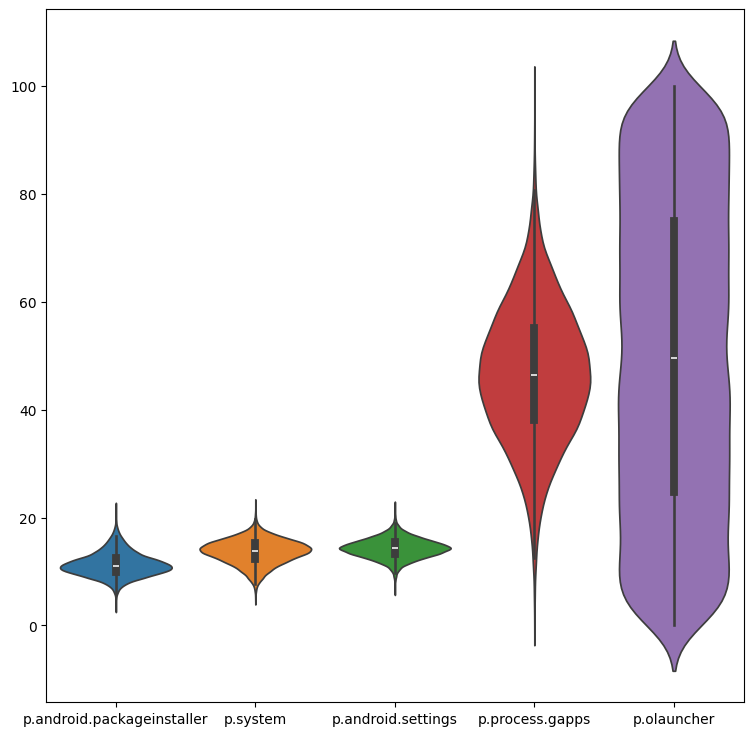

In [59]:
plt.figure(figsize=(9, 9)) 
sns.violinplot(processes[selected_processes_columns])
plt.show()

Violin grafy potvrdzujú, že p.olancher sleduje uniform distribúciu a ostatné atribúty sledujú normálnu distribúciu. Taktiež vidíme, že p.process.gapps má veľkú variáciu.

## profiles

Keďže tento súbor obsahuje skoro výlučne kvalitatívne atribúty, nemá ich význam analyzovať. Výnimkou by mohol byť atribút birthdate, ktorý by mohol súvisieť s predikovanou premennou vzhľadom na vek používateľov a množstvo zariadení s nainštalovaným malwarom, ale nateraz ho vynechám, keďže nám samotný dátum narodenia nič nepovie.

# 1.1.C a 1.1.D

V tejto časti máme za úlohu analyzovať koreláciu medzi náhodne zvolenými atribútmi a taktiež predikovanou premennou a atribútom. Rád by som najprv porovnal atribúty z rôznych tabuliek s podobným názvom a následne aj atribúty, ktoré na prvý pohľad nemajú navzájom nič spoločné, ale môžu nejakým spôsobom medzi sebou korelovať.


Toto dosiahneme tak, že si najprv si pripravíme mergnutý dataset (na základe atribútov imei a mwra), z ktorého následne vyprodukujeme heatmap, ktorý nám pomôže spozorovať, ktoré atribúty korelujú a ktoré nie:

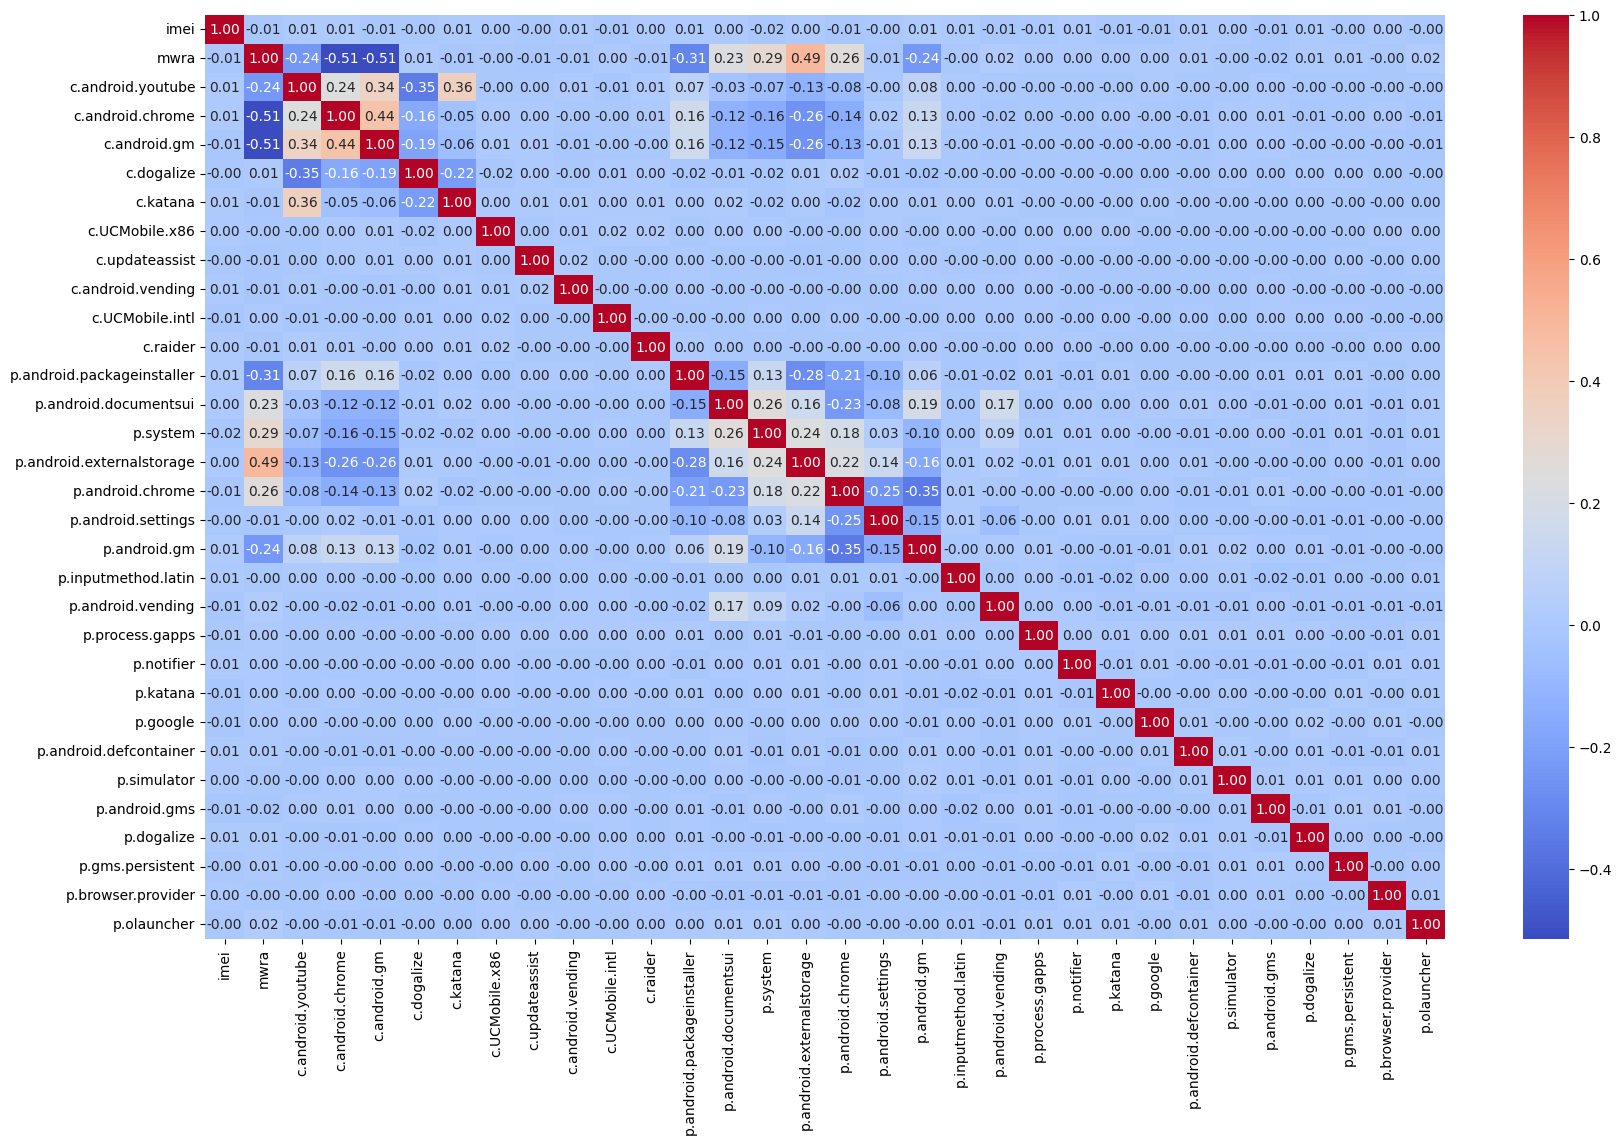

In [60]:
connections_processes_merged = pd.merge(connections, processes, on=['imei', 'mwra'])

numeric_attributes = connections_processes_merged.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(20, 12))
sns.heatmap(connections_processes_merged[numeric_attributes].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## 1.1.C

Z heatmapy vidno, že medzi sebou korelujú atribúty aj z iných súborov.

V tabuľke **connections** medzi sebou korelujú nasledovné atribúty:
- c.android.youtube
- c.android.chrome
- c.android.gm
- c.dogalize a
- c.katana.


V tabuľke **processes** medzi sebou korelujú tieto atribúty:
- p.android.packageinstaller
- p.android.documentsui
- p.system
- p.android.externalstorage
- p.android.chrome
- p.android.settings
- p.android.gm a
- p.android.vending (v menšej miere).


Zaujímavosťou sú tieto atribúty:
- c.dogalize
- c.katana
- p.android.gm a
- p.android.vending,

ktoré vôbec nekorelujú s atribútmi z druhej tabuľky, ale korelujú s atribútmi z vlastnej tabuľky.

Nasledovne vytvorím scatter ploty pre vzájomné premenné bez predikovanej premennej:

In [61]:
selected_attributes = ['c.android.youtube', 'c.android.chrome', 'c.android.gm', 'c.android.vending', 'c.katana', 'p.android.packageinstaller', 'p.system', 'p.android.settings', 'p.process.gapps', 'p.olauncher']

#sns.pairplot(connections_processes_merged[selected_attributes], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

## 1.1 D

Z heatmapy pozorujeme viaceré korelácie atribútov s predikovanou premennou.

Z tabuľky **connections** koreluju s premennou **mwra** tieto atribúty:
- c.android.youtube
- c.android.chrome
- c.android.gm

Z tabuľky **processes** korelujú s premennou **mwra** tieto atribúty:
- p.android.packageinstaller
- p.android.documentcui
- p.system
- p.android.external.storage
- p.android.chrome
- p.android.gm


# Zhrnutie analýzy 1.1 E

Opísali sme kolerácie medzi atribútmi navzájom a atríbutmi s predikovanou premennou. Ako sme si mohli všimnúť, tak niektoré atribúty, ktoré kolerujú s predikovanou premennou, tak korelujú aj medzi sebou. Pokiaľ by to bola vysoká korelácia ako napr. 80% a viac, tak by to nebolo ideálne a jednú takú premennú by sme museli vyhodiť, aby sme zamedzili riziku overfitting-u. 

Takáto korelácia sa v dátach nevyskytuje, tak nemusíme dáta mazať z tohoto dôvodou

Dáta ktoré vôbec nekorelujú s predikovanou premennou zmažeme, keďže nám neposkytujú pridanú hodnotu.



# 1.2 Identifikácia problémov, integrácia a čistenie dát

## 1.2 A

### Duplicitné záznamy

#### Exaktné duplikáty

In [62]:
connections.duplicated().value_counts()

False    14982
True       180
Name: count, dtype: int64

Vidíme, že tabuľka **connections**  má 180 duplikátov.

Musíme ich odstrániť.

In [63]:
connections = connections.drop_duplicates()
connections.duplicated().value_counts()

False    14982
Name: count, dtype: int64

In [64]:
devices.duplicated().value_counts()

False    2973
True        9
Name: count, dtype: int64

Tabuľka **devices** má 9 duplikátov,

In [65]:
devices = devices.drop_duplicates()
devices.duplicated().value_counts()

False    2973
Name: count, dtype: int64

In [66]:
processes.duplicated().value_counts()

False    14982
True       180
Name: count, dtype: int64

Tabuľka **processes** má 180 duplikátov

In [67]:
processes = processes.drop_duplicates()
processes.duplicated().value_counts()

False    14982
Name: count, dtype: int64

In [68]:
profiles.duplicated().value_counts()

False    2518
Name: count, dtype: int64

Tabuľka **profiles** nemá žiadne duplikáty

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# !!!!!!!!!! Dokoncit user_id a imei duplikaty

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Nevhodná štruktúra dát

V tabuľke profiles sme si mohli všimnúť, že stĺpec location má spojené atribúty latitude a longitude do jedného, zatiaľ čo v tabuľke devices sú oddelené.

Bude lepšie ich oddeliť a hneď upraviť ich typ na float, keďže nám to pomôže aj s následným odstránením chýbajúcich hodnôt.

In [69]:
def multiple_remove(substrings:list, string:str):
    for substring in substrings:
        string = string.replace(substring, '')
    return string

locations = profiles.current_location
longitude = np.array([], dtype=float)
latitude = np.array([], dtype=float)
for location in locations:
    if(pd.isna(location)):
        longitude = np.append(longitude, np.nan)
        latitude = np.append(latitude, np.nan)
    else:
        lat, lon = location.split(',')
        lat = multiple_remove(['(Decimal(', ')', '\''], lat)
        lon = multiple_remove(['Decimal(', ')', '\''], lon)
        longitude = np.append(longitude, float(lon))
        latitude = np.append(latitude, float(lat))
        
profiles['latitude'] = pd.Series(latitude)
profiles['longitude'] = pd.Series(longitude)
profiles = profiles.drop(labels='current_location', axis=1)

Ďalej pozorujeme, že registration obsahuje rôzne formáty. Tie musíme zjednotiť. Taktiež môžeme rovno daný dátový typ prekonvertovať na vbudovaný dátum v knižnici Pandas:

In [70]:
# Function to preprocess date strings
def preprocess_date(date_str):
    for fmt in ('%d/%m/%Y, %H:%M:%S', '%d %b %Y', '%Y-%m-%d', '%Y/%m/%d'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.to_datetime(date_str, errors='coerce')

# Apply the preprocessing function to the 'registration' column
profiles['registration'] = profiles['registration'].apply(preprocess_date)

# Convert the datetime column to a singular string format
profiles['registration'] = profiles['registration'].dt.strftime('%Y-%m-%d')

profiles.registration.head()

0    2019-03-11
1    2023-05-07
2    2019-03-16
3    2018-07-04
4    2022-05-21
Name: registration, dtype: object

### Chýbajúce hodnoty

In [71]:
devices[devices.isnull().any(axis=(1))]

,latitude,longitude,store_name,code,location,imei
1829,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,863033069630348545
2850,-21.98333,16.91667,Okahandja,NaN,Africa/Windhoek,3590433799317661016


Vidíme, že tabuľka **devices** obsahuje 2 chýbajúce prvky.
Vďaka informácii z atribútu location vieme určiť, že code by mal obsahovať skratku Namíbie.

In [72]:
devices.code = devices.code.fillna('NA')
devices[devices.isnull().any(axis=(1))]

,latitude,longitude,store_name,code,location,imei


Odstránili sme problém chýbajúcich hodnôt v tabuľke **devices**

In [73]:
profiles.info()
profiles.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2518 non-null   object 
 1   ssn           2518 non-null   object 
 2   birthdate     1385 non-null   object 
 3   company       2518 non-null   object 
 4   imei          2518 non-null   int64  
 5   user_id       2518 non-null   int64  
 6   address       2140 non-null   object 
 7   username      2518 non-null   object 
 8   registration  2518 non-null   object 
 9   mail          2518 non-null   object 
 10  job           755 non-null    object 
 11  latitude      2392 non-null   float64
 12  longitude     2392 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 255.9+ KB


name               0
ssn                0
birthdate       1133
company            0
imei               0
user_id            0
address          378
username           0
registration       0
mail               0
job             1763
latitude         126
longitude        126
dtype: int64

Vidíme, že tabuľka profiles má pri niektorých atribútoch príliš veľa chýbajúcich hodnôt, tie riadky zmažeme.
V riadkoch, kde chýba málo hodnôt, sa pokúsime dať inú reprezentatívnu hodnotu

In [74]:

for label, column in profiles.items():
    ratio = len(column.dropna()) / len(column)
    #imputation threshhold should be 80%
    if(ratio < 0.3):
       profiles = profiles.drop(label, axis=1)
    elif(ratio > 0.8 and ratio < 1):
        if(column.dtype == 'float64'):
            profiles[label] = column.fillna(column.mean())

Všimol som si, že pri birthdate chýba veľa hodnôt. Nechcel som tento stĺpec úplne zmazať, keďže možno mal nejakú pridanú hodnotu, ale po spojení tohto atribútu s atribútmi v tabuľke processes, sme zistili, že nekoreluje ani s mwra ani s inými atribútmi. Tak tento stĺpec zmažeme.

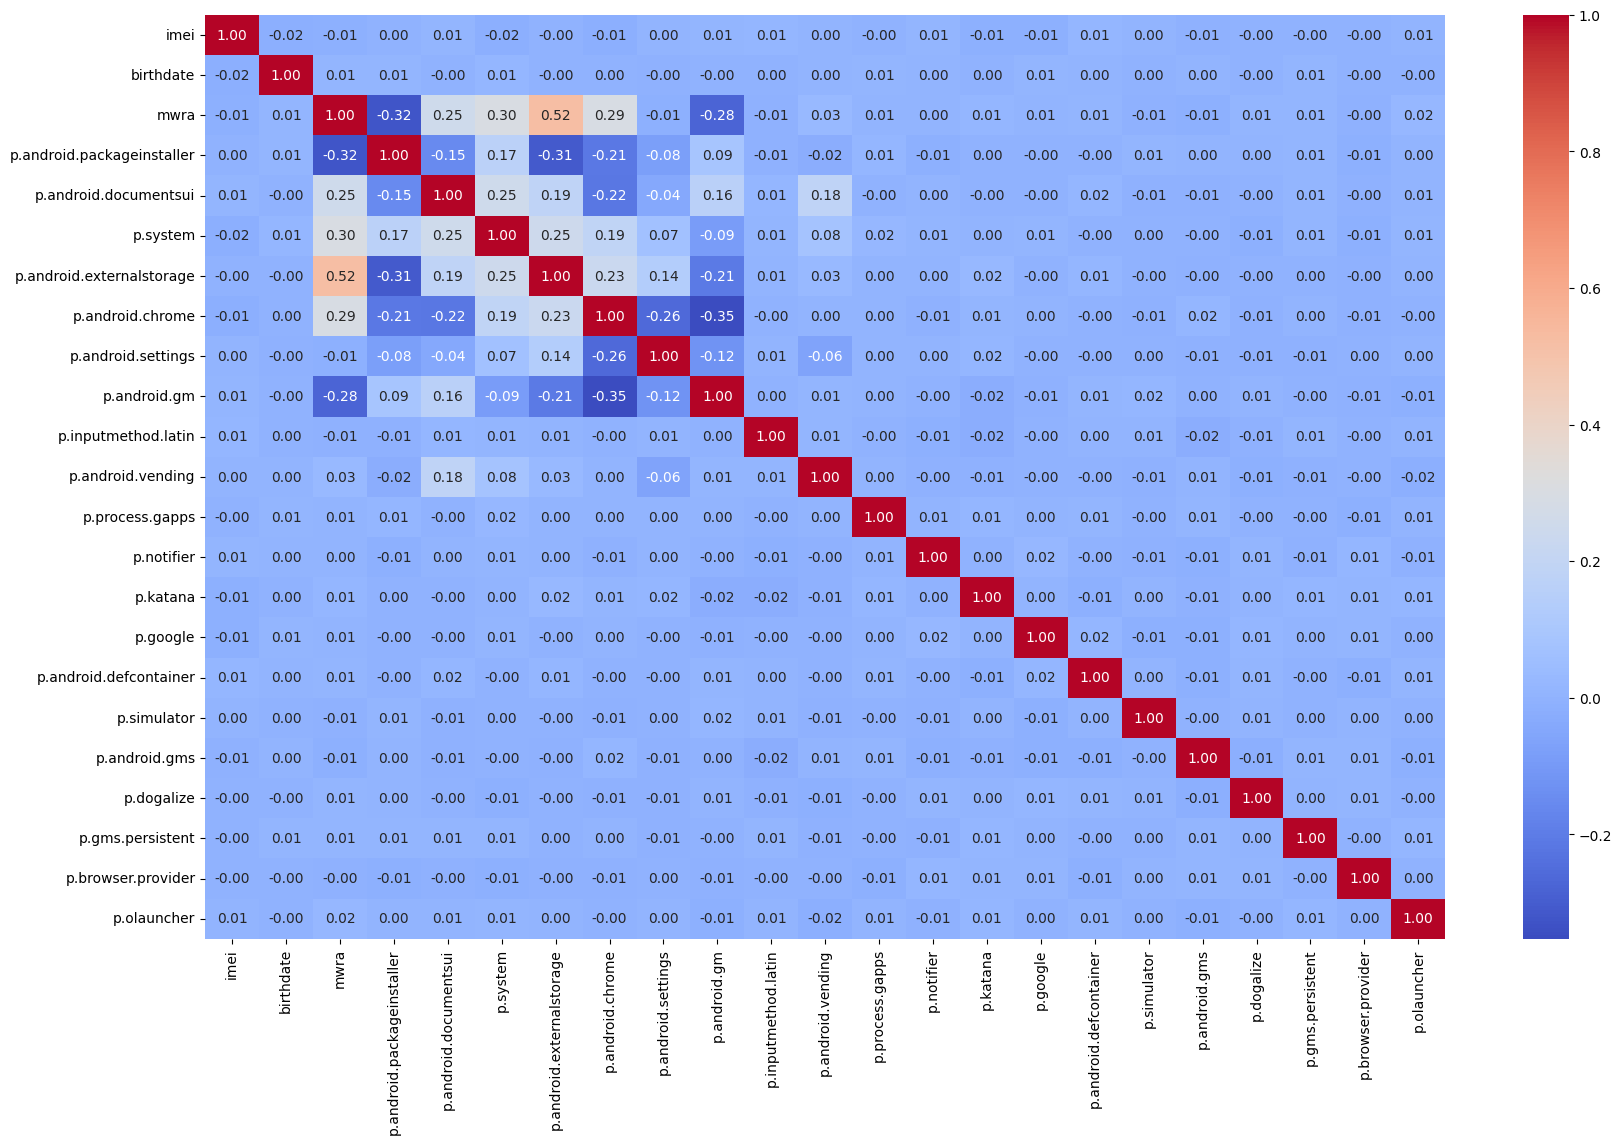

In [75]:
pivot = profiles[['imei', 'birthdate']]
pivot = pivot.dropna(axis=0)
pivot['birthdate'] = pd.to_datetime(pivot['birthdate'], errors='coerce')
dataframe = pd.merge(pivot, processes, on='imei')
dataframe['birthdate'] = dataframe['birthdate'].map(pd.Timestamp.toordinal)

numeric_attributes = dataframe.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(20, 12))
sns.heatmap(dataframe[numeric_attributes].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [76]:
profiles.drop('birthdate', axis=(1), inplace=True)
profiles.head()

,name,ssn,company,imei,user_id,address,username,registration,mail,latitude,longitude
0,Adam Buckley,256-10-3282,Thompson PLC,8630330696303481321,261,"2356 Kelly Stravenue\nNorth Nicholechester, WV...",brandyvaughn,2019-03-11,brooksmelinda@hotmail.com,-27.796214,35.724897
1,William Mccall,836-85-9036,"Brewer, Jones and Simpson",359043379931766197,1432,"83245 Jack Port Suite 186\nHeathermouth, MP 26449",daniel34,2023-05-07,michellehaley@gmail.com,-0.976225,1.754715
2,Tabitha Silva,316-02-7078,James Group,3590433799317661321,340,"6584 Jody Flat\nMichaelport, DC 53671",ashley60,2019-03-16,xmartinez@yahoo.com,75.646349,-101.730814
3,Diane Perez,207-68-5498,"Warren, Frank and Cox",8630330696303481362,447,"6554 Fox Haven\nStokesstad, IA 11756",richardhoward,2018-07-04,fischerlindsey@gmail.com,-78.024023,-40.012949
4,Mrs. Sharon Villegas,389-65-1005,Green-Richardson,8630330696303482287,1342,"67336 Peter Rue\nKathyland, AK 30553",mcbrideshaun,2022-05-21,gilbertwilliam@yahoo.com,62.486365,112.231295


Ešte potrebujeme vyriešiť atribút adress. Tam nám chýba málo hodnôt.

In [78]:
profiles.address.mode()

0       0002 Emily Ports Suite 925\nNew Annetteton, AR...
1       00030 Bentley Plains Suite 306\nLake Willietow...
2       001 Collins Burgs Suite 505\nEast Danieltown, ...
3          0013 Charles Pike\nNorth Josephville, OK 49260
4         0018 Frank Rest\nNorth Timothyborough, VI 59540
                              ...                        
2135                     Unit 9851 Box 1268\nDPO AE 73246
2136                     Unit 9855 Box 7814\nDPO AA 14423
2137                     Unit 9861 Box 9254\nDPO AE 35078
2138                     Unit 9902 Box 3994\nDPO AE 22829
2139                     Unit 9959 Box 6420\nDPO AA 66843
Name: address, Length: 2140, dtype: object

V atribúte adress nevieme nájsť hodnotu, ktorú by sme dosadili za chýbajuce hodnoty.
Preto len nahradíme NaN hodnoty za hodnotu **unknown**.

Môj predpoklad je, že s týmto atribútom nebudeme môcť predikovať premennú y, tak zatiaľ to riešim takto.

In [82]:
profiles['address'] = profiles.address.fillna('Unknown')

Týmto krokom sme vyriešili problém chýbajúcich hodnôt.

### Vychýlené hodnoty

V dátach sa nachádza mnoho vychýlených hodnôt, ako sme mohli pozorovať už v boxplotoch.

Môžeme to riešiť dvoma spôsobmi, nahradením hodnoty za hraničnú hodnotu alebo odstránením.

In [11]:
def replace_outliers(dataframe, col):
    Q3 = dataframe[col].quantile(0.95)
    Q1 = dataframe[col].quantile(0.05)
    dataframe.loc[dataframe[col] < Q1, col] = Q1
    dataframe.loc[dataframe[col] > Q3, col] = Q3
    return dataframe

Na tabuľku **processes**, teda na konkrétne číselné atribúty, ktoré nesledujú unfirm distribúciu použijeme výmenu hodnôt.

In [7]:
columns = list(processes.columns)
columns = columns[3:]

for column in columns:
    processes = replace_outliers(processes, column)

Potvrdíme odrstránenie vychýlených hodnôt pomocou ďalšieho grafu

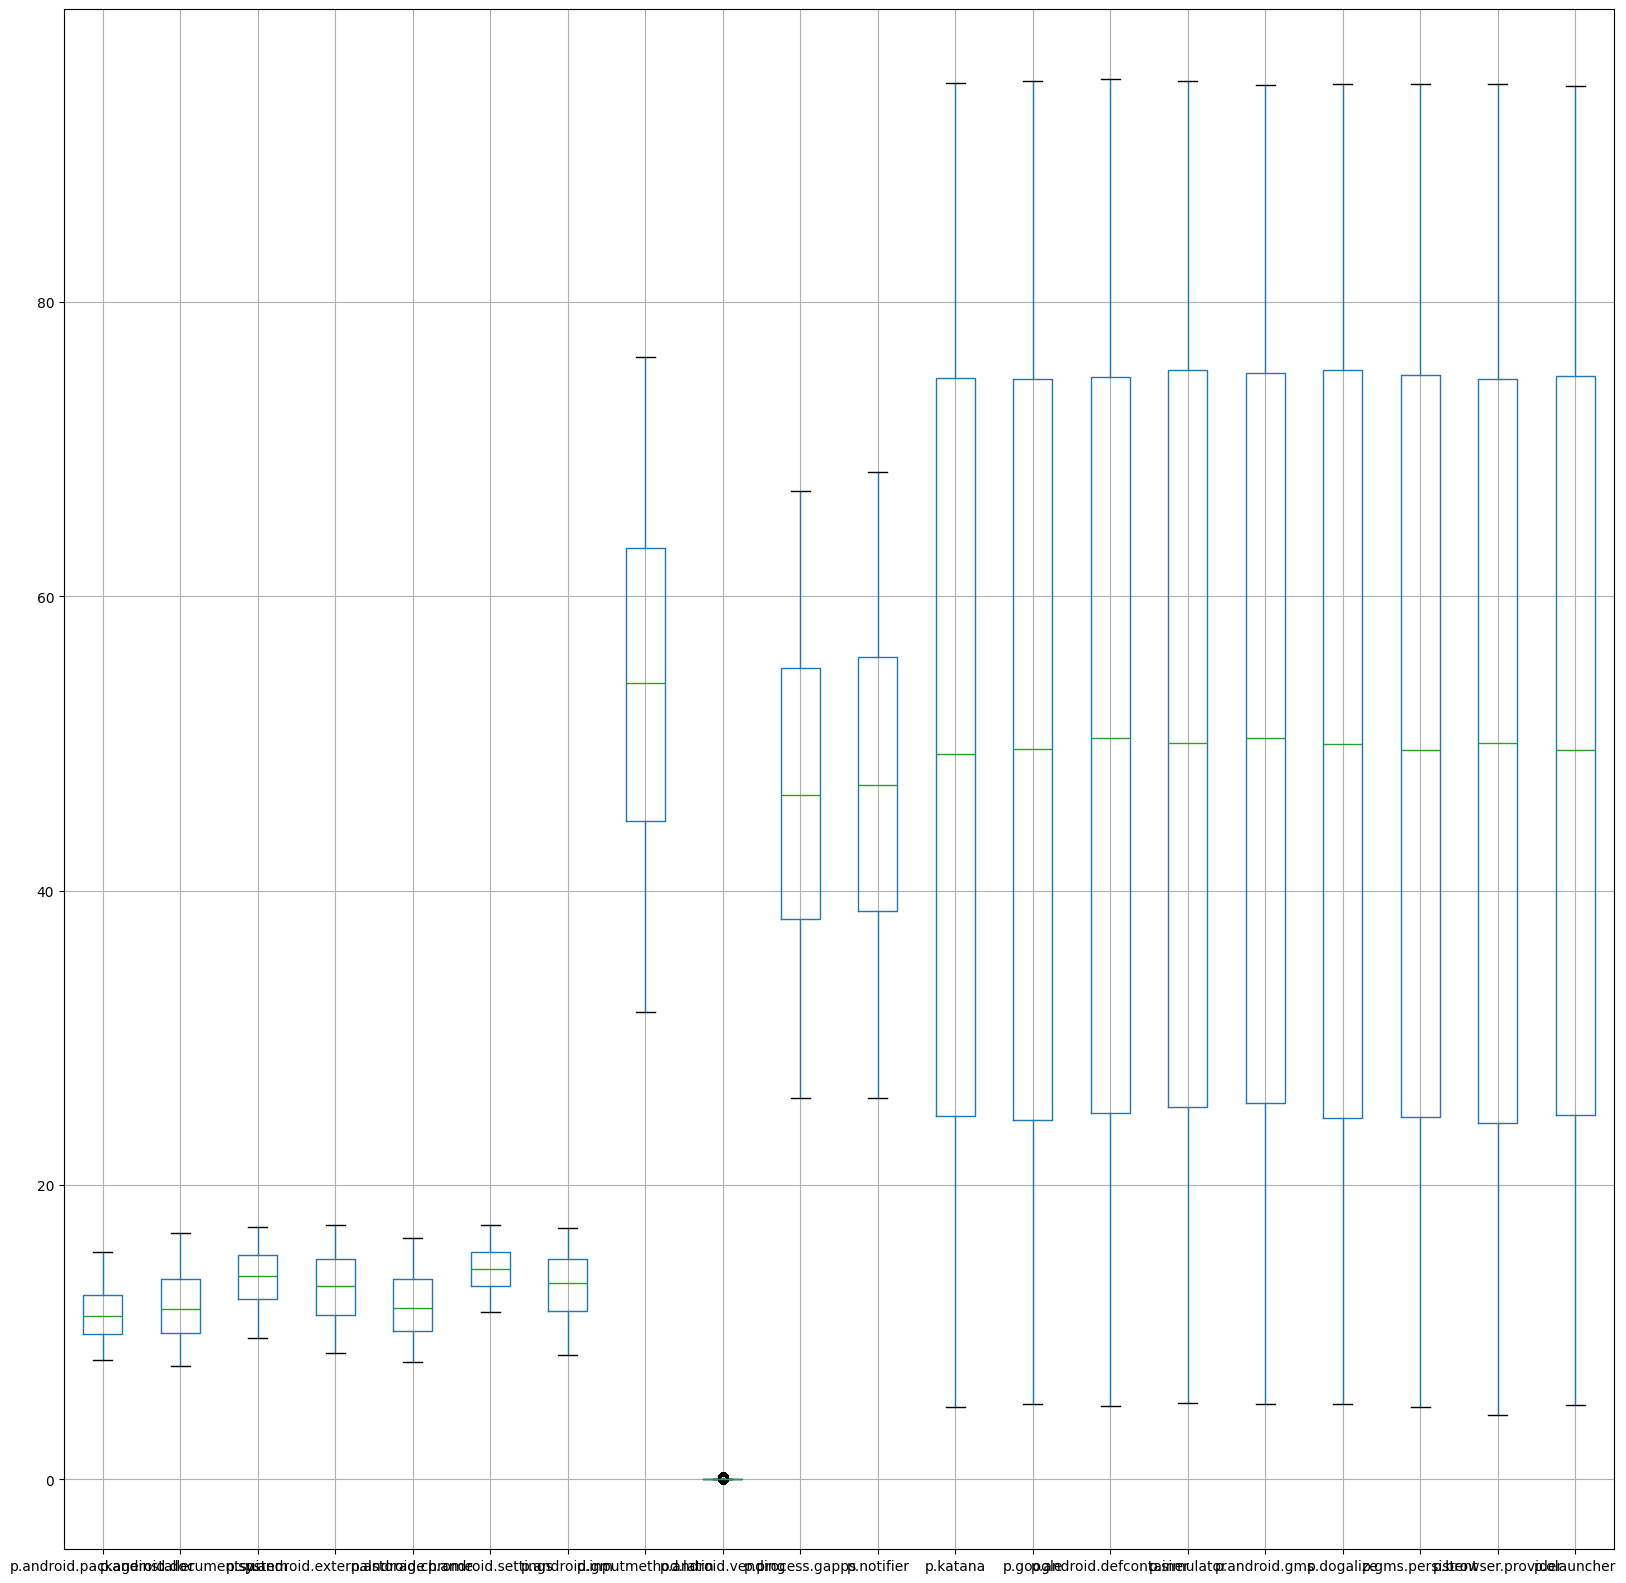

In [8]:
plt.figure(figsize=(20,20))
processes[columns].boxplot()
plt.show()

Teraz ideme vyriešiť vychýlené hodnoty tabuľky connections

Tu to vyriešime pomocou odstránenia vychýlených hodnôt.
Budeme odstraňovať hodnoty len nad 95. quantilom a pod 5. quantilom, aby sme neodstránili príliš veľa dát.

In [12]:
def delete_outliers(dataframe, col):
    Q3 = dataframe[col].quantile(0.95)
    Q1 = dataframe[col].quantile(0.05)
    IQR = dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)
    return dataframe.loc[(dataframe[col] < Q1 - 1.5*IQR) | (dataframe[col] > Q3 + 1.5*IQR), col].index

In [13]:
columns = list(connections.columns)[3:]

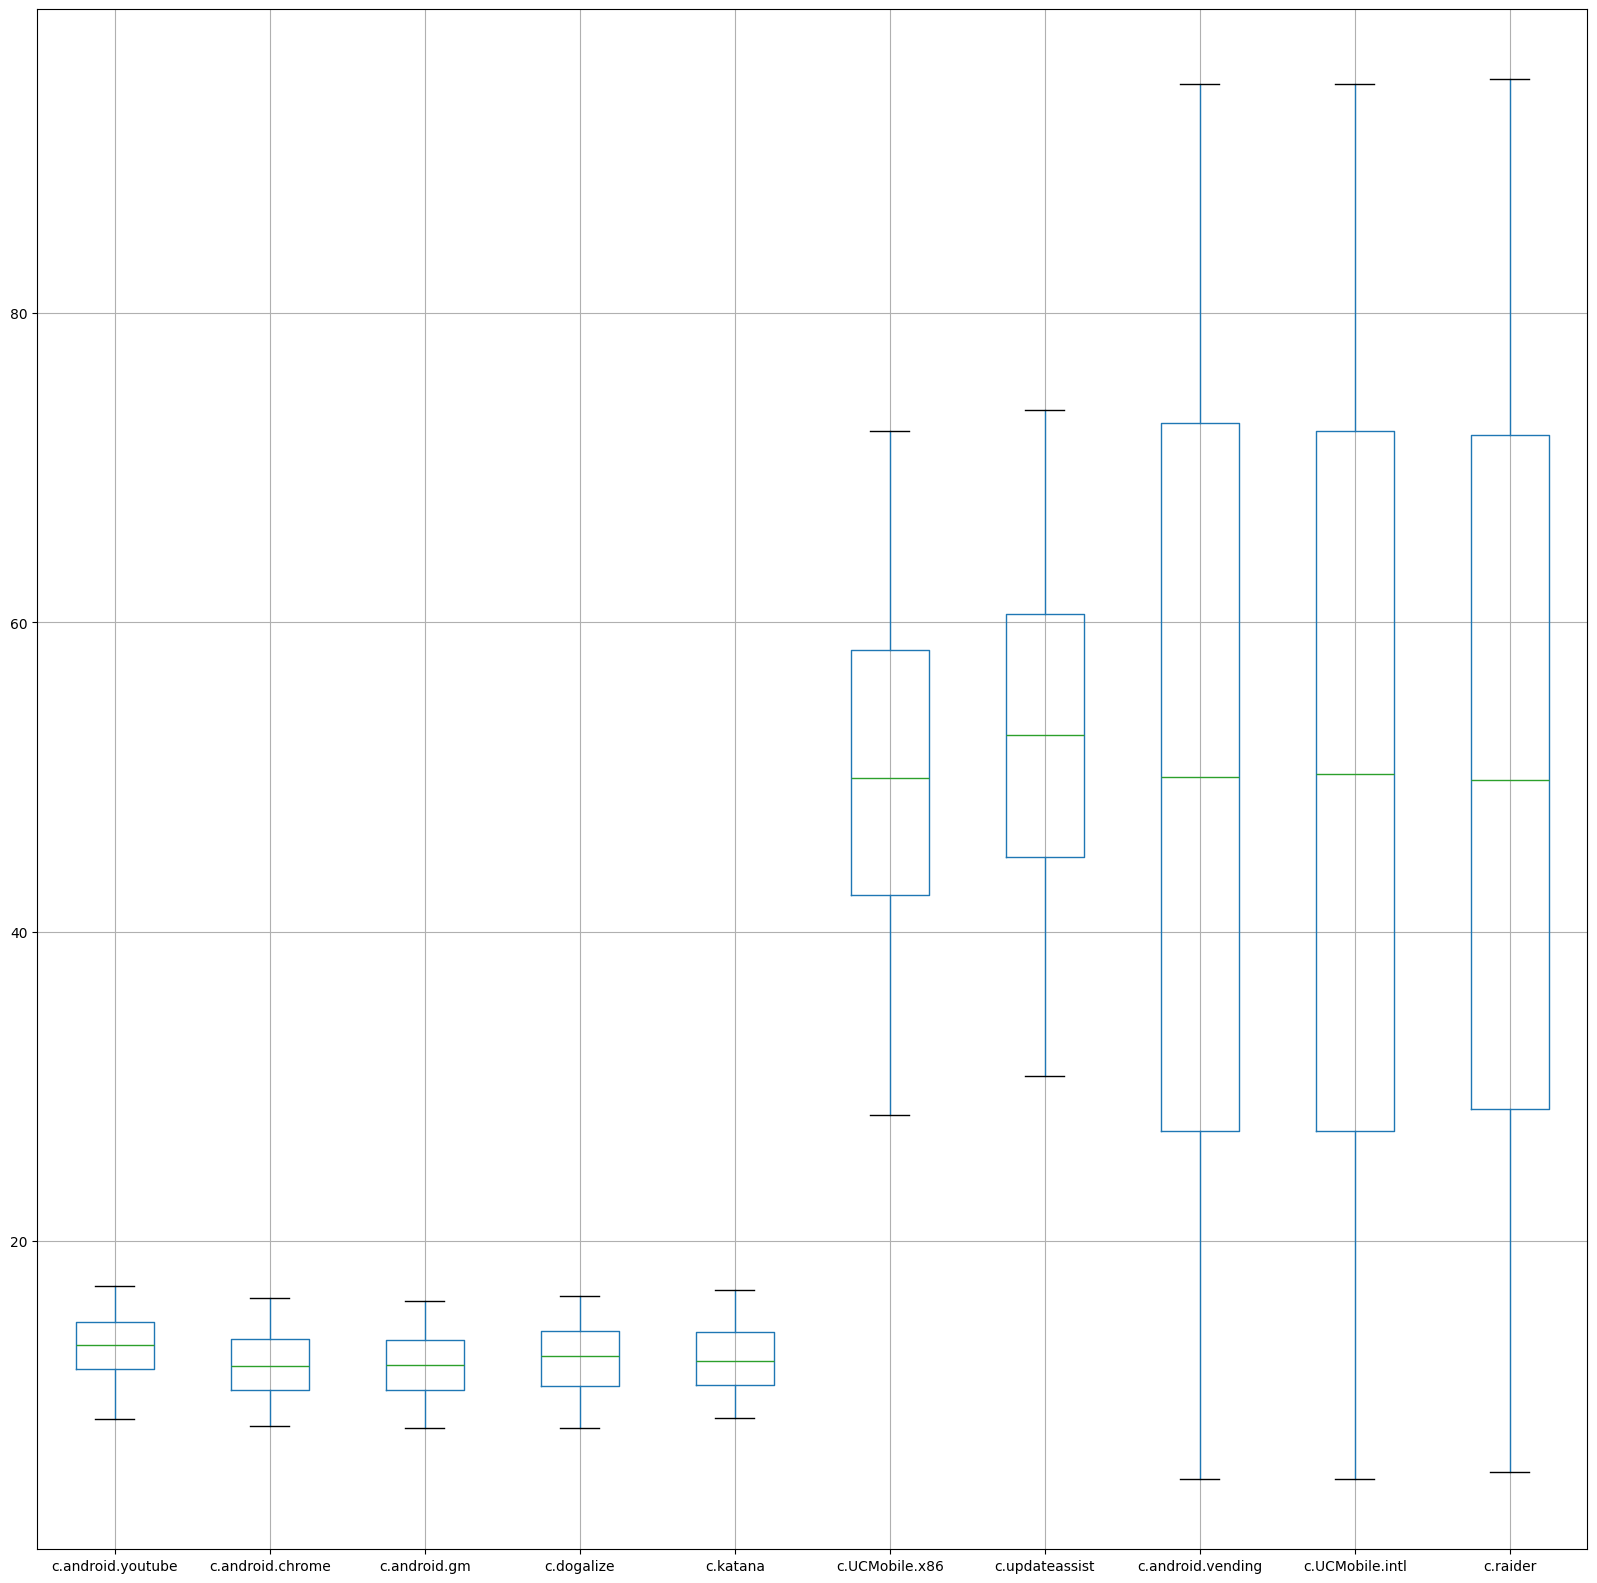

In [14]:
for column in columns:
    indexes = list(delete_outliers(connections, column))
    for item in indexes:
        connections = connections.drop(item)

plt.figure(figsize=(20,20))
connections[columns].boxplot()
plt.show()

Na grafoch vidíme, že sme odstránili všetky vychýlené hodnoty.

# 1.3

## 1.3 A

### 1. hypotéza: Na zariadeniach v stave malware related activity je častejšie používaná aplikácia Chrome ako na zariadeniach v normálnom stave.

0.0


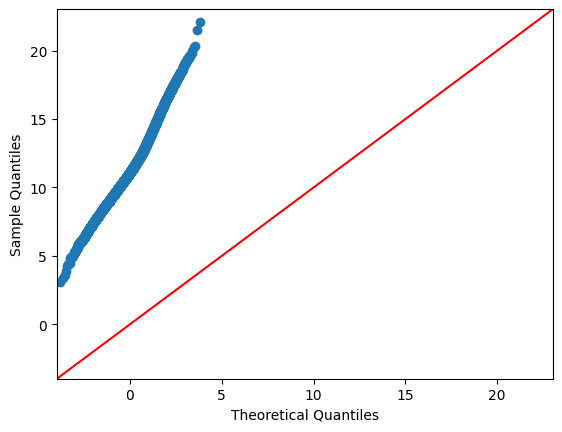

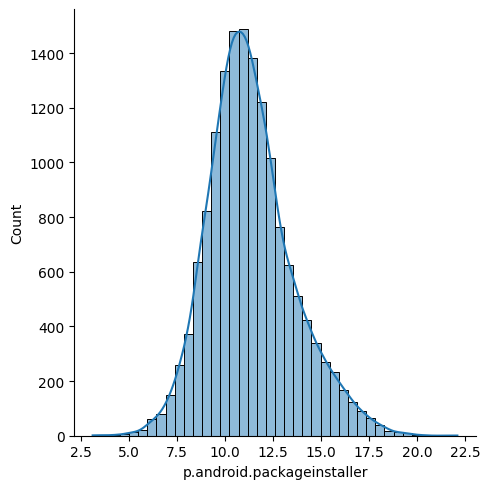

In [27]:
import statsmodels.api as sm

sm.qqplot(processes["p.android.packageinstaller"], line ='45')

# shapiro_test = stats.shapiro(connections["c.android.chrome"])
# shapiro_test = stats.shapiro(processes["p.android.packageinstaller"])
# print(shapiro_test.pvalue)

sns.displot(processes["p.android.packageinstaller"], bins=40, kde=True)
ks_test = stats.kstest(processes["p.android.packageinstaller"], 'norm')
print(ks_test.pvalue)

